In this example, we show how to use the pre-computed $p(\gamma|e)$ grid. The grid is generated by 1e7 simulated binaries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
from matplotlib import rcParams
rcParams.update({'font.size': '18'})
rcParams.update({'font.family': 'sans-serif'})
rcParams.update({'axes.facecolor': 'white'})
rcParams.update({'axes.edgecolor': 'black'})
rcParams.update({'axes.labelcolor': 'black'})
rcParams.update({'xtick.top': 'True'})
rcParams.update({'xtick.major.pad': '6.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.right': 'True'})
rcParams.update({'ytick.major.pad': '6.0'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'legend.fontsize': '18'})
rcParams.update({'figure.figsize': '8.0, 6.0'})
rcParams.update({'figure.dpi': '100'})
rcParams.update({'figure.facecolor': 'white'})
rcParams.update({'figure.edgecolor': 'white'})
rcParams.update({'image.cmap': 'rainbow'})

Load the data using np.load()

In [7]:
e_list, vr_angle_list_center, hist_list = np.load('./grid_data/data.npy', allow_pickle=True)

The grid is computed for eccentricity from 0 to 1, with a step of 0.01:

In [9]:
e_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

The grid is computed for v-r angles (i.e. $\gamma$) from 0 to 180 degrees, with a step of 1 degree:

In [34]:
vr_angle_list_center

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

hist_list stores the two-dimensional histogram of 1e7 simulated binaries. The first axis is for eccentricity, and the second axis is for v-r angles.

In [13]:
hist_list.shape

(100, 180)

Below we plot $p(\gamma|e)$ for selected eccentricities. 

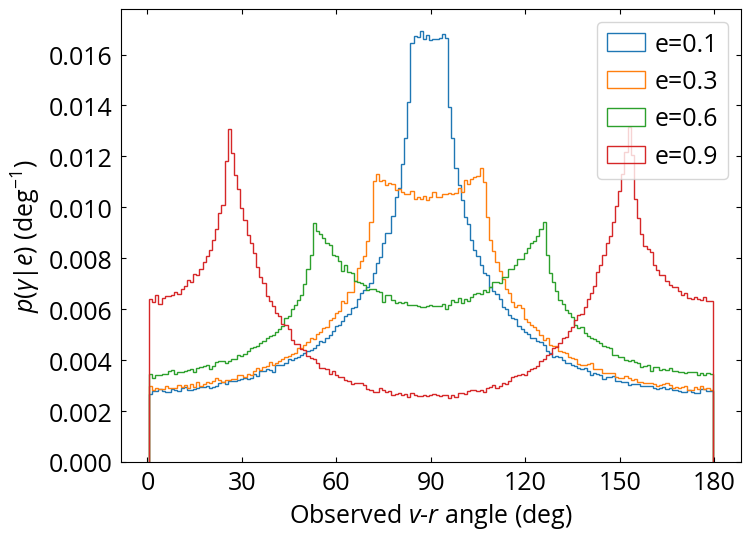

In [41]:
e_to_print = [0.1, 0.3, 0.6, 0.9]

for e in e_to_print:
    
    row = (e_list == e)
    
    
    plt.hist(
        np.arange(0., 180., 1.),
        vr_angle_list_center,
        weights=hist_list[row, :].reshape(180),
        label='e=%.1f' %(e),
        histtype='step'
    )

plt.legend()
#plt.ylim([0., None])
plt.xticks([0, 30, 60, 90, 120, 150, 180])
plt.xlabel(r'Observed $v$-$r$ angle (deg)')
plt.ylabel(r'$p(\gamma|e)$ (deg$^{-1}$)')
plt.show()